## Stats 131 Final Project
### Cristina Sanchez, Jericho Villareal, Valeria Lopez, Valerie Chen

## Background

The data set was derived from Kaggle titled **Movie Industry**: *Three decades of movies*. The link can be found here: https://www.kaggle.com/danielgrijalvas/movies/version/2

“IMDb is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, fan and critical reviews, and ratings” 

IMDb provides a variety of information such as user rating, the number of user votes per movie, budget, information of directors, writers, stars, production companies, as well as box office reportings of films.

In this report, data on popular movies pulled from the IMDb website will be analyzed. Popularity is determined by the number of visits to the movies' page from when the movie was listed on IMDb to the day the data was scraped by Daniel Grijalva on October 4, 2017. This data was collected in 2017 and was created using IMDB’s advanced search tool, which can filter movies based on desired specifications such as year it was released, user ratings, genres, production companies, US rating certificates, runtime, cast and crew members, and others. In this case, the data set was filtered using the movie's popularity and year it was released, then selecting the top 220 movies.

This data set contains 6820 observations and 15 variables.
The top 220 movies were collected for each year spanning three decades starting from 1986 to 2016.
Data was subset to only include movies from the USA because the gross column of the dataset only refers to the gross reportings in the USA. Each row in the data set is made up of a unique movie.
The variables in this data set are “budget”, “company”, “country”, “director”, “genre”, “gross”, “name”, “rating”, “released”, “runtime”, “score”, “votes”, “star”, “writer”, “year”.

Budget refers to the budget of the movie which is the cost, in US dollars, of producing and shooting the film. Values of 0 in the budget column indicate a missing entry. This may be due to studios being reluctant to report how much a film cost, mainly when a movie does not perform well. Also, reported budgets may change over time due to escalating costs, and they may be difficult to calculate.

Company refers to the name of the production company of a film, the entity or entities that are responsible for the development and filming of a movie. Films generally have multiple production companies, and this data set pulled the first company listed on IMDb, which listed production companies based on how they appeared in the film.

Country refers to the name of the country of origin of the movie, essentially where the movie comes from and is produced.

Director is the name of the director of the film. A film director has control over a movie's artistic aspects and guides the crew and actors in fulfilling their vision of what the movie should look like. There may be multiple directors for a movie, but this data set uses the first director listed on IMDB, which listed directors based on how they appeared in the film.

Genre is the main genre of the movie which refers to the category or type of movie such as comedy, action, horror, romance, drama, mystery, adventure, animation, etc.

Gross refers to the US box office gross of a movie. This indicates how much a movie made in the US selling tickets at movie theaters.

The name variable refers to the title of the movie.

The rating column relates to the rating of the movie. The rating of a movie in the US refers to the US certificate label a movie is given based off the Motion Picture Association of America’s system which rates a film's suitability for audiences based on its content. The ratings in the US include R, PG-13, PG, G, and NC-17. A NC-17 rating is a very restricted movie where no one under the age of 17 can be admitted; only adults are permitted. An R rating is a restricted movie where persons under the age of 17 need to be accompanied by an adult guardian or parent to view the film. A PG-13 rating urges parents to be cautious of material that may be unsuitable for children under 13 years of age. A PG rating suggests parental guidance as parents may not find some of the movie's content suitable for their young children. A G rating is for general audiences, meaning any person of any age may be admitted to view a film. Other rating types are included in the data based off the different country of origins' rating scheme.

Released indicates the release date of the movie in the format (YYYY-MM-DD). The released date is when the movie is first released to the public in theaters.

The runtime variable refers to the duration of the movie, in other words, how long the movie lasts from start to the end of credits.

The score category is the IMDb user rating ranked from 1 to 10. The score is a weighted average based on IMDb account holders' ratings of a film. 

Votes refers to the number of IMDb account user score ratings on a particular film.

The star column refers to the “main” actor or actress of a film. This data set takes the first person listed on the IMDb website, which is based off of the order of appearance in the film.

The writer indicates the writer of the movie. In some cases, this could be the script writer or the writer of a book in which a film may have been based on. This data set takes the first name listed on the IMDb website, as there can be multiple writers listed.

Year is the year in which a film was released.

The final data set used has 2131 observations and 12 variables, a few of which were made using the original data set's variables.


## Exploratory Data Analysis

In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
data = pd.read_csv("movies.csv", sep = "," ,encoding='latin-1')
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [2]:
# Initial data dimensions
data.shape

(6820, 15)

In [3]:
# Copy data and clean
cleanData = data.copy()

# Subset data set for variables interested in
cleanData = cleanData[['name','country','gross','runtime','rating','released','year']]

# Create month, y2, T_year variable
cleanData["month"] = cleanData.released.astype(str).str[5:7]
cleanData["y2"] = cleanData.released.astype(str).str[:4]
cleanData["T_year"] = cleanData.year.astype(str) == cleanData.y2.astype(str)
cleanData = cleanData[cleanData.T_year == True]

# Filter for movie ratings, country, and year
cleanData = cleanData[cleanData['rating'].isin(['R', 'PG-13', 'PG', 'G'])]
cleanData = cleanData[cleanData.country == "USA"]
cleanData = cleanData[cleanData.year >= 2000] 

# Adjusting for inflation
# cleanData['adjusted'] = cleanData.apply(lambda x: cpi.inflate(x.gross, x.year, to = 2016), axis = 1)

cleanData.head()

,name,country,gross,runtime,rating,released,year,month,y2,T_year
3080,Requiem for a Dream,USA,3609278.0,102,R,2000-12-15,2000,12,2000,True
3081,Gladiator,USA,187705427.0,155,R,2000-05-05,2000,05,2000,True
3082,American Psycho,USA,15070285.0,102,R,2000-04-14,2000,04,2000,True
3083,The Patriot,USA,113330342.0,165,R,2000-06-28,2000,06,2000,True
3086,Remember the Titans,USA,115654751.0,113,PG,2000-09-29,2000,09,2000,True


In [4]:
# Data dimensions
cleanData.shape

(2131, 10)

The original data set contains 6820 observations with 15 variables. Out of the 15 varaibles, 7 were used and 4 were created. The final data set has 2131 observations and 12 variables. The name of the movie was kept as an identifier as well as the country of origin. Country was filtered to movies in th USA only in order to have a more in depth analysis for . Gross was adjusted for inflation to 2016 in order to accurately compare movies over time. Runtime and rating were kept becuase these variables describe undisputable data for a movie. Rating was filtered to the 4 major movie labels in the US which are R, PG-13, PG, and G. Released and year were kept in order to perform timeseries analysis with year being filtered from 2000 to 2016 only because according to IMDb, gross data may not be as reliable going more than 15 years back. Other variables such as company and director were removed because the data is not reliable as IMDb has multiple listings for these categories. Other variables relating to time were created for analysis.

In [5]:
# Summary statistics
cleanData.describe(include = "all")

,name,country,gross,runtime,rating,released,year,month,y2,T_year
count,2131,2131,2.131000e+03,2131.000000,2131,2131,2131.000000,2131,2131,2131
unique,2127,1,NaN,NaN,4,1010,NaN,12,17,1
top,Fantastic Four,USA,NaN,NaN,PG-13,2006-10-13,NaN,10,2007,True
freq,2,2131,NaN,NaN,931,7,NaN,235,143,2131
mean,NaN,NaN,6.148969e+07,106.416237,NaN,NaN,2007.874237,NaN,NaN,NaN
std,NaN,NaN,7.640650e+07,16.381310,NaN,NaN,4.822108,NaN,NaN,NaN
min,NaN,NaN,1.785000e+03,72.000000,NaN,NaN,2000.000000,NaN,NaN,NaN
25%,NaN,NaN,1.468506e+07,96.000000,NaN,NaN,2004.000000,NaN,NaN,NaN
50%,NaN,NaN,3.713422e+07,103.000000,NaN,NaN,2008.000000,NaN,NaN,NaN
75%,NaN,NaN,7.784244e+07,115.000000,NaN,NaN,2012.000000,NaN,NaN,NaN


In [6]:
# Load data set with adjusted gross 

cleanData = pd.read_csv("moviesAdjusted.csv")
cleanData.drop(cleanData.columns[[0]], axis=1, inplace=True)
cleanData.head()

,name,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
0,Requiem for a Dream,USA,3609278.0,102,R,2000-12-15,2000,12,2000,True,5.030499e+06,Break
1,Gladiator,USA,187705427.0,155,R,2000-05-05,2000,5,2000,True,2.616180e+08,Break
2,American Psycho,USA,15070285.0,102,R,2000-04-14,2000,4,2000,True,2.100449e+07,Session
3,The Patriot,USA,113330342.0,165,R,2000-06-28,2000,6,2000,True,1.579563e+08,Break
4,Remember the Titans,USA,115654751.0,113,PG,2000-09-29,2000,9,2000,True,1.611960e+08,Session


In [7]:
# Data dimensions
cleanData.shape

(2131, 12)

This final data set that was used for analysis includes gross adjusted for inflation as well as a new variable created called "school" from the following plot.

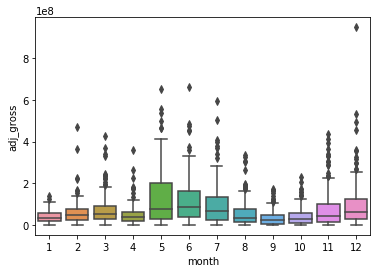

In [8]:
# Boxplot showing monthly significance WRT adjusted
ax = sns.boxplot(x="month", y="adj_gross", data=cleanData)
ax

From the plot above, we can see that there is a sine-like curve trend in the means of adjusted gross across the 12 months. We see a gradual increases from January to March, a decrease in April, then a spike starting in May that gradually decreases to September, then begins to gradually increase again to December, then decreasing again after December. We noticed that the trend corresponds with the academic calendar year; school is typically in session during the months of January, February, March, April, September, October, and November, and breaks are typically during the months of May, June, July, and August for summer and December for winter. This may indicate that adjusted gross is influenced in part by the amount of free time people may have during breaks versus in-session periods of school. More people, children and teenagers in particular, likely significantly contribute to a movie's box office gross.

In [9]:
# # Mapping for school timeline
# d = {"01" : "Session",
#      "02" : "Session",
#      "03" : "Session",
#      "04" : "Session",
#      "05" : "Break",
#      "06" : "Break",
#      "07" : "Break",
#      "08" : "Break",
#      "09" : "Session",
#      "10" : "Session",
#      "11" : "Session",
#      "12" : "Break"
#     }
# cleanData["school"] = cleanData.month.map(d)
cleanData.head()

,name,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
0,Requiem for a Dream,USA,3609278.0,102,R,2000-12-15,2000,12,2000,True,5.030499e+06,Break
1,Gladiator,USA,187705427.0,155,R,2000-05-05,2000,5,2000,True,2.616180e+08,Break
2,American Psycho,USA,15070285.0,102,R,2000-04-14,2000,4,2000,True,2.100449e+07,Session
3,The Patriot,USA,113330342.0,165,R,2000-06-28,2000,6,2000,True,1.579563e+08,Break
4,Remember the Titans,USA,115654751.0,113,PG,2000-09-29,2000,9,2000,True,1.611960e+08,Session


Because of the boxplot above of month and adjusted gross, we split the months into two categories based on the academic calender: Break and Session. Break refers to the summer and winter break months of May, June, July, August, and December. Session refers to the months of school when it is in session: January, February, March, April, September, October, and November. We labeled the column "school" and were interested in using this variable in our models.

In [10]:
# Counts tables
a = cleanData.groupby(["month","rating"])["rating"].count().unstack("rating")
a

rating,G,PG,PG-13,R
month,,,,
1,NaN,13.0,54.0,38.0
2,5.0,16.0,73.0,49.0
3,6.0,33.0,68.0,65.0
4,3.0,20.0,72.0,67.0
5,2.0,25.0,77.0,38.0
6,7.0,29.0,88.0,42.0
7,4.0,36.0,81.0,61.0
8,2.0,22.0,95.0,103.0
9,NaN,22.0,79.0,104.0


In [11]:
b = cleanData.groupby(["month","rating"])["adj_gross"].mean().unstack("rating")
b

rating,G,PG,PG-13,R
month,,,,
1,NaN,4.695986e+07,4.351039e+07,3.689816e+07
2,6.202234e+07,6.956051e+07,5.281129e+07,6.608015e+07
3,8.287840e+07,1.300977e+08,6.902750e+07,4.457727e+07
4,1.252032e+08,4.452984e+07,6.192946e+07,3.059325e+07
5,2.972653e+08,1.768033e+08,1.504329e+08,6.833027e+07
6,2.568366e+08,1.231001e+08,1.242787e+08,6.996290e+07
7,2.490553e+07,1.056873e+08,1.254652e+08,5.084414e+07
8,1.338093e+08,5.644589e+07,6.738411e+07,3.978311e+07
9,NaN,6.795202e+07,4.241084e+07,2.091445e+07


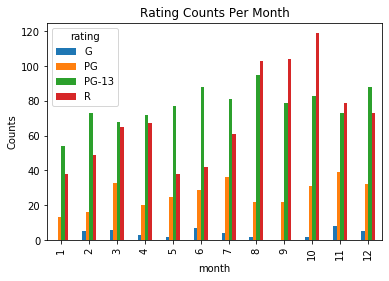

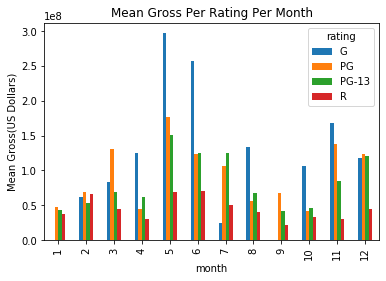

In [12]:
a.plot(kind = "bar")
plt.title("Rating Counts Per Month")
plt.ylabel("Counts")
b.plot(kind = "bar")
plt.title("Mean Gross Per Rating Per Month")
plt.ylabel("Mean Gross(US Dollars)")
plt.show()

In [13]:
cleanData[(cleanData.rating == "G") & (cleanData.month == 6)]

,name,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
684,Herbie Fully Loaded,USA,66023816.0,101,G,2005-06-22,2005,6,2005,True,8.113762e+07,Break
760,Cars,USA,244082982.0,117,G,2006-06-09,2006,6,2006,True,2.905835e+08,Break
890,Ratatouille,USA,206445654.0,111,G,2007-06-29,2007,6,2007,True,2.389694e+08,Break
1028,WALL·E,USA,223808164.0,98,G,2008-06-27,2008,6,2008,True,2.494881e+08,Break
1313,Toy Story 3,USA,415004880.0,103,G,2010-06-18,2010,6,2010,True,4.567821e+08,Break
1466,Cars 2,USA,191452396.0,106,G,2011-06-24,2011,6,2011,True,2.042772e+08,Break
1712,Monsters University,USA,268492764.0,104,G,2013-06-21,2013,6,2013,True,2.766182e+08,Break


In the plots above, we see the number of movies released and the mean adjusted gross per rating across the 12 months, respectively. We can see there are more R-rated movies released in August, September, October, and November than any other rating, which likely coincides with the release of Horror, Thriller, and Mystery films for the spooky seasons; however, R-rated films appear to have the least mean adjusted gross. It appears PG-13 movies are constantly being released with a small dip in January, and their mean adjusted gross trend follows a somewhat sine-like pattern. PG-rated movies appear to follow a seasonal trend with gradual increases then dips starting in January, April, and August, and their mean adjusted gross trend follows a more sine-like pattern as well. The number of G-rated movies is lowest, but they have a higher mean adjusted gross, mostly due to Disney movies as seen in the table above.

In [14]:
c = cleanData.groupby(["year","rating"])["rating"].count().unstack("rating")
c

rating,G,PG,PG-13,R
year,,,,
2000,3.0,14.0,54.0,56.0
2001,4.0,12.0,54.0,55.0
2002,5.0,16.0,57.0,49.0
2003,4.0,20.0,63.0,42.0
2004,2.0,25.0,62.0,35.0
2005,3.0,22.0,57.0,40.0
2006,4.0,23.0,60.0,34.0
2007,3.0,20.0,50.0,70.0
2008,5.0,17.0,66.0,51.0


In [15]:
d = cleanData.groupby(["year","rating"])["adj_gross"].mean().unstack("rating")
d

rating,G,PG,PG-13,R
year,,,,
2000,9.376080e+07,9.282397e+07,8.298663e+07,4.403239e+07
2001,1.747532e+08,9.183829e+07,7.464366e+07,4.034013e+07
2002,9.433136e+07,1.065047e+08,9.196278e+07,3.559744e+07
2003,1.751695e+08,8.378559e+07,7.908211e+07,6.167113e+07
2004,1.769523e+08,9.724263e+07,8.160975e+07,5.216879e+07
2005,9.249294e+07,8.794812e+07,7.663532e+07,3.921058e+07
2006,1.399472e+08,8.472929e+07,7.343745e+07,3.947016e+07
2007,1.297718e+08,1.076149e+08,9.056306e+07,2.968645e+07
2008,1.186398e+08,9.056637e+07,7.754464e+07,3.160127e+07


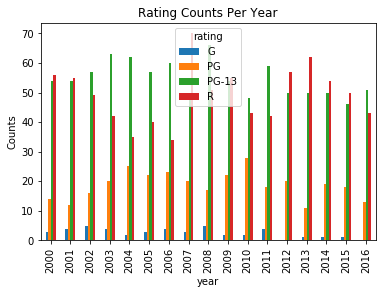

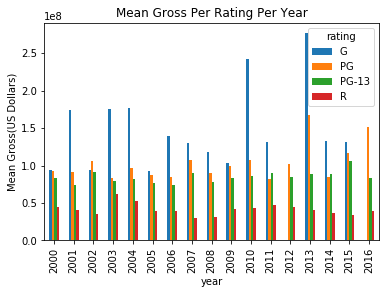

In [16]:
c.plot(kind = "bar")
plt.title("Rating Counts Per Year")
plt.ylabel("Counts")
d.plot(kind = "bar")
plt.title("Mean Gross Per Rating Per Year")
plt.ylabel("Mean Gross(US Dollars)")
plt.show()

In [17]:
cleanData[(cleanData.rating == "G") & (cleanData.year == 2003)]

,name,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
385,Finding Nemo,USA,380843261.0,100,G,2003-05-30,2003,5,2003,True,4.967666e+08,Break
447,Tierra de osos,USA,85336277.0,85,G,2003-10-31,2003,10,2003,True,1.113114e+08,Session
499,The Jungle Book 2,USA,47887943.0,72,G,2003-02-14,2003,2,2003,True,6.246436e+07,Session
503,Piglet's Big Movie,USA,23103423.0,75,G,2003-03-21,2003,3,2003,True,3.013578e+07,Session


In the plots above, we see the number of movies released and the mean adjusted gross per rating across the years 2000 to 2016, respectively. In general, there are more PG-13 movies, followed by R-rated, then PG, and lastly G. It appears the PG-13 trend follows a rough sine-like curve, the R-rated trend follows a cosine-like curve, the PG-rated trend follows a somewhat cosine-like curve, and the G-rated trend follows a sine-like curve. Although there are fewer G-rated films released through the years, their mean adjusted gross is typically highger than all the other ratings. The mean adjusted gross for PG-rated films follows behind, then PG-13 films, and lastly R-rated films.

In [18]:
e = cleanData.groupby(["school","rating"])["rating"].count().unstack("rating")
e

rating,G,PG,PG-13,R
school,,,,
Break,20,144,429,317
Session,24,174,502,521


In [19]:
f = cleanData.groupby(["school","rating"])["adj_gross"].mean().unstack("rating")
f

rating,G,PG,PG-13,R
school,,,,
Break,1.675699e+08,1.180207e+08,1.158749e+08,5.038284e+07
Session,1.140052e+08,8.647984e+07,5.723812e+07,3.450457e+07


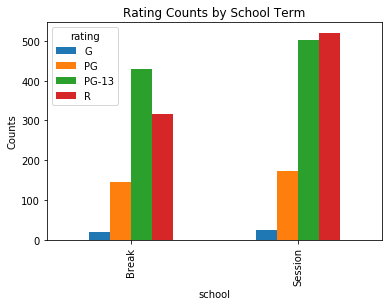

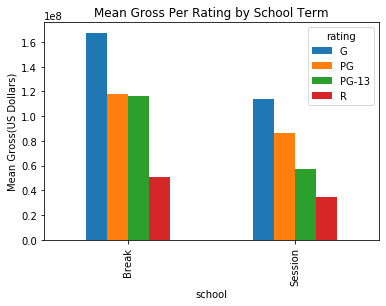

In [20]:
e.plot(kind = "bar")
plt.title("Rating Counts by School Term")
plt.ylabel("Counts")
f.plot(kind = "bar")
plt.title("Mean Gross Per Rating by School Term")
plt.ylabel("Mean Gross(US Dollars)")
plt.show()

In the plots above, we see the number of movies and mean adjusted gross per rating between Break and Session. There appear to be fewer R-rated movies released when on break, likely because younger kids have more free time and they are less likely to watch R-rated movies. The number of movies for G, PG, and PG-13 rated movies are relatively similar between Break and Session. In the plot of mean adjusted gross, we can see that G-rated films gross the most during Break, likely because the younger audience has more time to go to movie theaters then. Mean adjusted gross is also higher in Break for PG and PG-13 rated films, likely due to similar reasons for G-rated films. R-rated movies also had higher average gross during Break.

In [21]:
# Verify NaN's are because of 0 counts and not missing values
print(cleanData[(cleanData.rating == "G") & (cleanData.year == "2012")])

Empty DataFrame
Columns: [name, country, gross, runtime, rating, released, year, month, y2, T_year, adj_gross, school]
Index: []


/Users/cristinasanchez/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


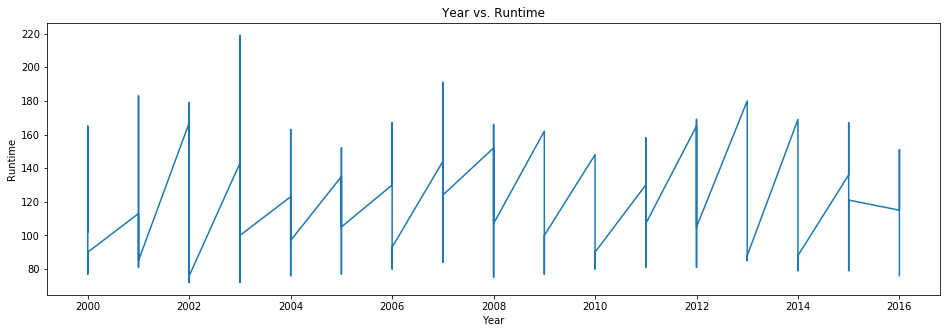

In [22]:
# Time analyzing year vs runtime
def plot_df(data, x,y, title="", xlabel='Year', ylabel='Runtime'):
    plt.figure(figsize=(16,5))
    plt.plot(x,y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(cleanData, x=cleanData['year'], y=cleanData['runtime'], title='Year vs. Runtime')  

From the plot above, we can see a slight general decrease in runtime across the years 2000 to 2016. Before filtering the years, we also produced a similar plot but from the years 1986 to 2016. We saw a more noticeable increase from 1986 to the early 1990s then a decrease starting in the early 1990s to 2016 in that plot, a curved trend similar to that of a skewed right distribution. It appears the runtime of movies is slowly decreasing or converging to approximately 2.5 hours.

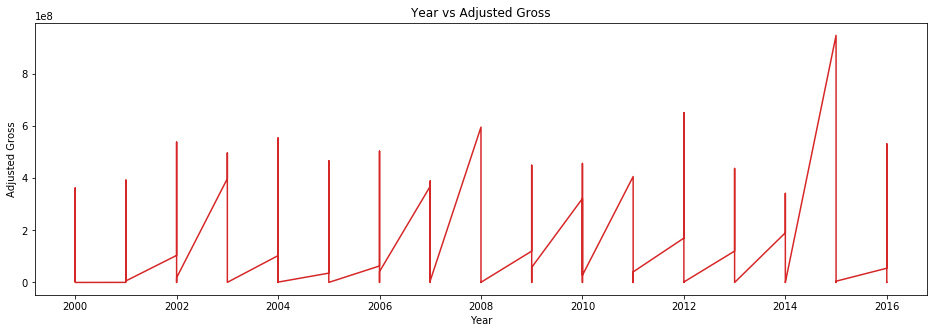

In [23]:
# Time analyzing year vs adjusted gross
def plot_df(data, x,y, title="", xlabel='Year', ylabel='Adjusted Gross'):
    plt.figure(figsize=(16,5))
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(cleanData, x=cleanData['year'], y=cleanData['adj_gross'], title='Year vs Adjusted Gross') 

From the plot above, we can see a generally even level of adjusted gross with a few relatively minor bumps and dips; however, there is a noticeably large spike in adjusted gross from 2014 to 2015. This may be due to the release of films related to huge franchises such as The Avengers, Star Wars, Jurassic World, X-Men, and Transformers. Interestingly, between the years of 2007 and 2010, we expected a more noticeable dip due to the Great Recession. However, it seems there was a small spike from 2007 to 2008, one of the most difficult years during the recession. From a psychological standpoint, this may be due to people wanting to escape from problems arising from the financial hit, so they continue to frequent theaters despite possible financial hardship.

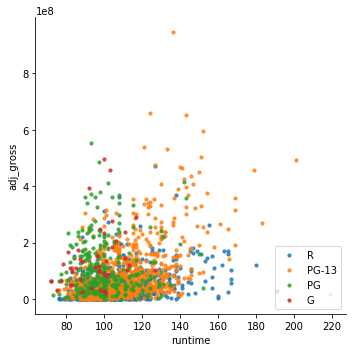

In [24]:
# Plot time showing insight on the breakdown of variables
order = ['R', 'PG-13', 'PG', 'G']
sns.lmplot( x="runtime", y="adj_gross", data=cleanData, fit_reg=False, hue='rating', hue_order = order,col_order = order, legend=False, scatter_kws={"s": 10})
plt.legend(loc='lower right')

In the scatterplot above, it appears PG-13 and R-rated movies have longer runtimes while G and PG-rated movies typically have shorter runtimes in the 2-hour or below range. G, PG, and PG-13 movies appear to have somewhat higher adjusted gross as runtime increases, but R-rated films do not have as strong a slope indicating as strong of a positive trend.

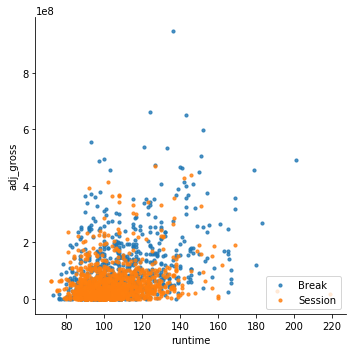

In [25]:
sns.lmplot( x="runtime", y="adj_gross", data=cleanData, fit_reg=False, hue='school', legend=False, scatter_kws={"s": 10})
plt.legend(loc='lower right')

In the scatterplot above, it appears movies released during Break seem to have longer runtimes and higher adjusted gross whereas movies released during Session typically have shorter runtimes and lower adjusted gross. This may be due to more people having more free time during Break to frequent theaters versus school time.

## Data Modeling

## Linear Regression

In STATS 100B and STATS 101A, we were taught that linear regression should follow the assumptions that stem from the Gauss-Markov Conditions. These are linearity, independence, normality, and homoskedasticity. We want our predictors to not be multicollinear with each other, the errors to be independent, and the residuals to be scattered randomly without a pattern across a fitted vs residual plot. 

In [26]:
cleanData = pd.read_csv("moviesAdjusted.csv", encoding="latin-1")
cleanData.head()

## Linear Regression ##
import statsmodels.formula.api as smf
import statsmodels.api as sm
model = smf.ols('np.sqrt(adj_gross) ~ np.sqrt(runtime) + C(rating) + C(school) - 1', 
               data = cleanData).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.sqrt(adj_gross)   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     171.6
Date:                Fri, 06 Dec 2019   Prob (F-statistic):          1.36e-153
Time:                        14:06:54   Log-Likelihood:                -20549.
No. Observations:                2131   AIC:                         4.111e+04
Df Residuals:                    2125   BIC:                         4.114e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(rating)[G]         -7647.1981   1207.820     -6.331      0.000      -1e+04   -5278.565
C(rating)[PG]        -1.006e+04   1116.123     -9.013      0.000   -1.22e+04   -7871.124
C(rating)[PG-13]     -1.197e+04   1148.151    -10.423      0.000   -1.42e+04   -9715.470
C(rating)[R]         -1.441e+04   1139.937    -12.640      0.000   -1.66e+04   -1.22e+04
C(school)[T.Session] -1473.6069    164.991     -8.931      0.000   -1797.168   -1150.046
np.sqrt(runtime)      1997.3170    108.479     18.412      0.000    1784.581    2210.053
==============================================================================
Omnibus:                      144.706   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.942
Skew:                           0.615   Prob(JB):                     4.20e-41
Kurtosis:                       3.762   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary statistics for this linear model shows that assuming a threshold of $\alpha = 0.05$, all of the predictors are considered significacnt. This means that the rating of a movie, its runtime, and whether it was released during Break or Session, can all explain some of the variability in adjusted gross. 

We transformed the model by square rooting the response variable adjusted gross and square rooting one of the predictor variables, runtime. This was done to achieve a better diagnostic results for OLS, particularly to improve multicollinearity and normality of errors.

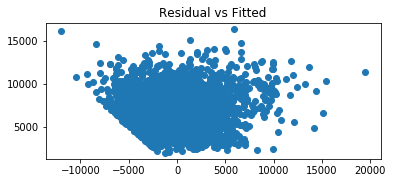

In [27]:
# Model Diagnostics: Linearity and Equal Variance
pred_val = model.fittedvalues.copy()
true_val = np.sqrt(cleanData['adj_gross']).values.copy()
residual = true_val - pred_val
fit, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)
plt.title("Residual vs Fitted")
plt.show()

The above diagnostic plot for linearity and homoskedasticity seems to adhere to the scattered nature of the residuals. However, there seems to be a boundary in the 3rd quadrant of the plot, so this may indicate that the constant variance assumption is not fully achieved.

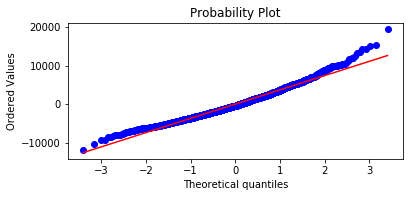

In [28]:
# Model Diagnostics: Normality
import scipy as sp
fig, ax = plt.subplots(figsize=(6, 2.5))
_, (_, __, r) = sp.stats.probplot(residual, plot=ax, fit=True)

The above diagnostic plot for normality shows that all of the points seem to lie on top of the normal qq line. 

In [29]:
# Fitting an ANOVA Model
atab = sm.stats.anova_lm(model, typ = 2) ; atab

,sum_sq,df,F,PR(>F)
C(rating),7.180125e+09,4.0,128.686802,1.687850e-98
C(school),1.112707e+09,1.0,79.770584,8.890786e-19
np.sqrt(runtime),4.728679e+09,1.0,339.001662,2.333284e-70
Residual,2.964128e+10,2125.0,NaN,NaN


The `PR(>F)` column of the ANOVA table tells us that all predictors -- `rating`, `school`, and `sqrt(runtime)` are all significant.

#### Findings 

A simple OLS model was fit in the dataset to show how much certain factors i.e. a movie's rating, its runtime, and its release seasonality, affect the variability in gross sales of a movie. 

## Fitting Models using a Binary Response

One glaring observation we saw during the exploratory data analysis was the amount of gross sales hit of all the movies grouped by each month. Because of this we wanted to fit models that both cater to finding out a binary classification of movies, given its features. 

We asked ourselves, "If I was a movie producer, do I have to care about when the timing at which I have to release my movie?" We added the column `school` (with a binary category -- *Break* or *Session*) in the data set because as students, we know that there are certain months that schools are in break or in session. 

Given our prior knowledge as students undergoing both semester and quarterly education, we decided that typically *Break* months are June, July, August, and December; while the rest of the months are in *Session*. 

We want to know how likely is a movie released during *Break* or *Session* given its adjusted gross, rating, runtime, month and year the movie was released.

### Logistic Regression

As we have learned in our statistics classes, logistic regression is great when trying to fit a binary variable (0 or 1, *Break* or *Session*). We have encoded the categorical variables into dummy variables. Example, rating with 4 factors in 1 column will be encoded into 4 columns with each column labaled as 0 or 1. 

In [30]:
# # Start with preprocessing the data set #
cleanData = pd.read_csv("moviesAdjusted.csv", encoding="latin-1")
cleanData['adj_gross_sq'] = np.sqrt(cleanData['adj_gross'])
data2 = cleanData

In [31]:
## Logistic Regression ## 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

school_map = {'Break':0, 'Session':1}
data2['school_map'] = data2['school'].map(school_map)
data2['rating'] = data2['rating'].astype('category')
data2['month'] = data2['month'].astype('category')
data2['year'] = data2['year'].astype('category')

# Create dummy variables
cat_vars = ['rating', 'month']
dummy = pd.get_dummies(data2[cat_vars])
data2 = pd.concat([data2, dummy], axis=1)

In [32]:
# Training and Testing (75/25)
X = data2[['adj_gross_sq','runtime','rating_G','rating_PG','rating_PG-13','rating_R',
           'month_1','month_2','month_3','month_4','month_5','month_6',
          'month_7','month_8','month_9','month_10','month_11','month_12',]]

X_breaks_only = data2[['adj_gross_sq','runtime','rating_G','rating_PG','rating_PG-13','rating_R',
                    'month_6','month_7','month_8','month_12']]

X_no_month = data2[['adj_gross_sq','runtime','rating_G','rating_PG','rating_PG-13','rating_R']]

y = data2['school_map']

# X_no_month
X_train,X_test,y_train,y_test = train_test_split(X_no_month ,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/cristinasanchez/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


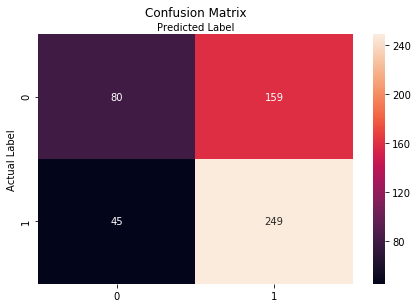

In [33]:
## Confusion Matrix
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

# Plot Confusion Matrix
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6172607879924953
Precision: 0.6102941176470589
Recall: 0.8469387755102041


#### Findings

We decided to fit in three sets of predictors: 
- `X` includes all predictors
- `X_breaks_only` does not include dummy variable with months that are in *Session*.
- `X_no_month` only has adjusted gross, runtime, and rating (encoded into dummy variables -- rating_G, rating_PG-13, rating_PG, rating_G)

As expected, using `X` and `X_breaks_only` yielded into predicting which movies are in *Break* and which movies are in *Session*. While not using any months at all yielded an accuracy rate of about 62%.

It is good to note that this accuracy rate was achieved with a validation set approach using an arbitrary train/test split cutoff at 75%/25%.  

### K-Means Clustering

The K-Means algorithm is a type of unsupervised machine learning model that seeks to learn, from the properties of the data, an optimal division or discrete labelling of groups of points. This article by Jake VanderPlas who is the author of **Python Data Science Handbook** explains in-depth K-Means Clustering: <https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html> 

In our case, we wanted to know how the algorithm can classify our dataset into two categories -- both which can correspond to *Break* and *Session*. The input for K-Means clustering are all numerical variables, so each categorical variable should be converting into an numbers. 

In [35]:
def rating_to_numeric(x):
    if x == 'PG-13':
        return 4
    if x == 'PG':
        return 3
    if x == 'R':
        return 2
    if x == 'G':
        return 1

def school_to_numeric(x):
    if x == 'Session':
        return 1
    if x == 'Break':
        return 0

data2['rating_num'] = data2['rating'].apply(rating_to_numeric)
data2['school_num'] = data2['school'].apply(school_to_numeric)
data2_num = data2[['adj_gross', 'runtime', 'month', 'year', 'rating_num']]

In [36]:
## K Means Clustering ##
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)

# Fitting the input data
clusters = kmeans.fit(data2_num)

# Getting the cluster labels
labels = kmeans.predict(data2_num)

# Centroid values
centroids = kmeans.cluster_centers_

from sklearn.metrics import accuracy_score
1 - accuracy_score(data2['school_num'], labels) 

0.3707179727827311

In [37]:
## Confusion Matrix ##

from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(data2['school_num'], labels)
conf_matrix

array([[ 203,  707],
       [  83, 1138]])

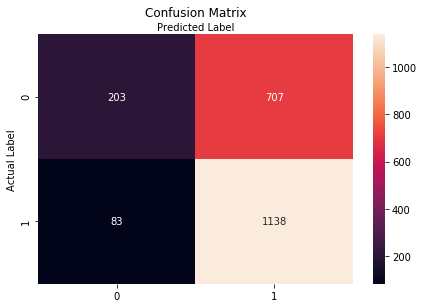

In [38]:
# Plot Confusion Matrix
class_names = [1,0] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [39]:
print(pd.DataFrame(labels)[0].value_counts(),"\n\n",data2['school'].value_counts())

1    1845
0     286
Name: 0, dtype: int64 

 Session    1221
Break       910
Name: school, dtype: int64


#### Findings

Using an unsupervised clustering algorithm yielded an accuracy rate of around 63%, which is a couple of percentage points off than the logistic regression model that did not use months (`X_no_month`). 

From our EDA, we know that there 57% (1221) of the movies are in *Session* and  43% of the movies are classified as *Break*. The K-Means label classified movies into 0 or 1 with the former occupying 13% (286) of the prediction and the latter occupying 87% (1845). From the confusion matrix, it looks like the accuracy rate might be flipped rendering the accuracy rate as `1 - 63% = 37%`. 

## Conclusion

After performing our exploratory data analysis, we were able to see some interesting patterns and trends. For example, the most interesting finding was the significance between adjusted gross and months in the year. From these findings, we developed a guiding question of: is there significance in the variables we selected with respect to adjusted gross, and what can we infer from the relationships between these variables? We found that the trend seen in the relationship between month and adjusted gross followed that of the academic calendar where higher adjusted gross were during the months of summer and winter break versus that of during the months of school when in session. Through data modeling, we found that the variables "school" (derived from months), "rating", and "runtime" were statistically significant with respect to adjusted gross. Our findings suggest that movies released during Break gross more than those released during Session; this is likely because more people (generally the younger audiences) have more time to go see movies in theater. Younger audiences often have an accompanying person when going to theaters, so less restrictive ratings generally have higher adjusted gross because at least two tickets (one for child, one for chaperone) are typically sold per child who go watch movies in theaters, which may lead to greater gross. 